## <center> <strong> Linear Regression </strong> </center>
## <center> <strong> Name: Haris Tahir Rana </strong> </center>

- The aim of this assignment is to familiarize you with Univariate Linear Regression and Multivariate Linear Regression.<br> <br>
- I have used Python programming language to implement the code. <br> <br>
- I did NOT use the scikit learn library to implement any function, unless mentioned otherwise.

## Dataset Description

- The `temperatures.csv` dataset is designed for bias correction of next-day maximum and minimum air temperature forecasts produced by the Local Data Assimilation and Prediction System (LDAPS) operated by the Korea Meteorological Administration. <br> <br>
- It covers summer seasons from 2013 to 2017 in Seoul, South Korea.

Dataset Summary:
- **Feature Type:** Real
- **Instances:** 7586
- **Input Features:** 21 (including present-day temperature data, LDAPS model forecasts, and geographical information)
- **Output:** Next-day maximum (Next_Tmax)


We want to predict the next day temperature given the various features

#### Libraries used

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler

/var/folders/5l/z_f8vl_56236dtty6zj589g00000gn/T/ipykernel_69213/1078987359.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Import Dataset

Here we load the `temperatures.csv` file using <b>Pandas</b> library

In [2]:
df = pd.read_csv('temperatures.csv')

## Part 1 - Univariate Regression 

In this part, we will develop a univariate regression model using maximum temperature on present day `(Present_Tmax)` to predict the next day temperature `(Next_Tmax)`

#### 1) Feature Extraction:

We first extract the `Present_Tmax` column as input and the `Next_Tmax` column as output from the dataset.

In [3]:
x1 = df['Present_Tmax'].values.reshape(-1,1)
y1 = df['Next_Tmax'].values.reshape(-1,1)

#### 2) Splitting the dataset
We then make a 70-30 split to divide the dataset into training and test datasets which will result in 4 variables: X_train, Y_train, X_test, Y_test

In [4]:
x1_train, x1_test, y1_train, y1_test = model_selection.train_test_split(x1, y1, test_size=0.3, random_state=42)

mean1 = np.mean(x1_train)
stdev1 = np.std(x1_train)

normalized_x1_train = (x1_train - mean1)/stdev1
normalized_x1_test = (x1_test - mean1)/stdev1

### 3) Learn the parameters
In this part, we will fit the linear regression parameters $\theta_0$ and $\theta_1$ to the given dataset.

The objective of linear regression is to minimize the cost function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left(\hat {y}^{(i)} - y^{(i)}\right)^2$$

where the hypothesis $\hat {y}^{(i)}$ is the predicted value for a given x and is given by the linear model and $m$ is the total number of datapoints
$$ \hat {y} =  h_\theta(x) = \theta_0 + \theta_1 x$$

The parameters of our model are the $\theta_j$ values. These are
the values we will adjust to minimize the cost $J(\theta)$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update

$$ \theta_0 = \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^m \left( \hat {y}^{(i)} - y^{(i)}\right)$$

$$ \theta_1 = \theta_1 - \alpha \frac{1}{m} \sum_{i=1}^m \left( \hat {y}^{(i)} - y^{(i)}\right)x^{(i)}$$

With each step of gradient descent, the parameters $\theta_0$ and $\theta_1$ come closer to the optimal values that will achieve the lowest cost $J(\theta)$.

In [5]:
def predict_SLR(normalized_array, theta0, theta1):  #This function will return the predicted value of y based on the given parameters
    y_predicted = []
    for value in normalized_array:    
        y_predicted = theta0 + (theta1 * normalized_array)
    return y_predicted

def cost_SLR(y_actual, y_hypothesis): 
    cost = 0
    for i in range (0,len(y_hypothesis)):
        cost = cost + ((y_hypothesis[i] - y_actual[i]) ** 2)
    print(cost)
    cost = (cost/(2 * len(y_hypothesis)))
    return cost

def sum_theta0 (y_actual, y_hypothesis):
    sum = 0
    for i in range(0, len(y_actual)):
        sum = sum + ((y_hypothesis[i] - y_actual[i]))
    return sum

def sum_theta1 (y_actual, y_hypothesis, normalized_array):
    sum = 0
    length = len(y_actual)
    for i in range(0, length):
        sum = sum + ((y_hypothesis[i] - y_actual[i]) * normalized_array[i])
    return sum
    
def gradient_descent_SLR(x,y,alpha,epochs):
    J = [] 
    theta0 = 0.5
    theta1 = 0.5
    for epoch in range(epochs):
        temp = predict_SLR(x, theta0, theta1)
        cost = cost_SLR(y, temp)
        J.append(cost)
        
        theta0 = theta0 - ((alpha/len(y))*(sum_theta0(y, temp)))
        theta1 = theta1 - ((alpha/len(y))*(sum_theta1(y, temp, x)))

    return theta0,theta1,J        

#### 4) Running Linear Regression

The hyperparameters (epochs and learning rate) are then tuned to get the best fit model for linear regression

In [8]:
n_epoch = 1000
alpha = 0.01

theta0, theta1, J = gradient_descent_SLR(normalized_x1_train, y1_train, alpha, n_epoch)
print('Predicted theta0 = %.4f, theta1 = %.4f, cost = %.4f' % (theta0, theta1, J[-1]))

[4740933.96372086]
[4647232.6842841]
[4555396.06030814]
[4465386.98514927]
[4377169.09058608]
[4290706.73212467]
[4205964.97459667]
[4122909.57804348]
[4041506.98388169]
[3961724.30134371]
[3883529.29418825]
[3806890.36767517]
[3731776.55579971]
[3658157.50878057]
[3586003.48079712]
[3515285.31797054]
[3445974.4465842]
[3378042.86153843]
[3311463.1150351]
[3246208.30548714]
[3182252.06664925]
[3119568.55696421]
[3058132.44912188]
[2997918.91982563]
[2938903.63976239]
[2881062.7637724]
[2824372.92121461]
[2768811.2065237]
[2714355.16995515]
[2660982.80851431]
[2608672.55706616]
[2557403.2796218]
[2507154.2607986]
[2457905.19744999]
[2409636.190462]
[2362327.73671308]
[2315960.72119378]
[2270516.40928329]
[2225976.43917983]
[2182322.81448143]
[2139537.89691452]
[2097604.39920719]
[2056505.37810425]
[2016224.22752125]
[1976744.67183485]
[1938050.75930661]
[1900126.85563767]
[1862957.63765176]
[1826528.08710377]
[1790823.48461168]
[1755829.40370918]
[1721531.70501665]
[1687916.53052808]
[1

/var/folders/5l/z_f8vl_56236dtty6zj589g00000gn/T/ipykernel_69213/1030341190.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Predicted theta0 = %.4f, theta1 = %.4f, cost = %.4f' % (theta0, theta1, J[-1]))


#### 5) Plotting results

 This should output a graph with the original dataset points and the linear regression model using the learned values of theta0 and theta1


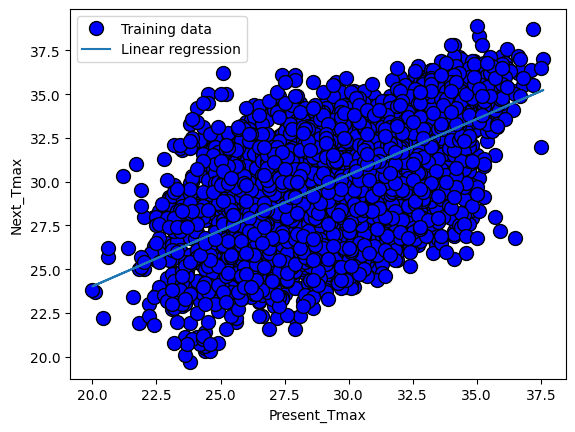

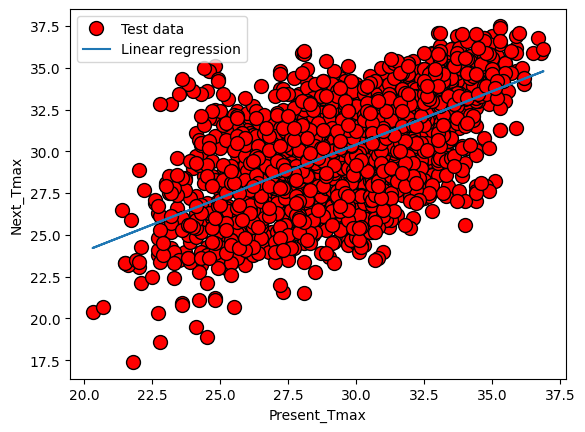

In [9]:
#DO NOT EDIT THIS CELL.
y1_pred_list_train = list()
for x in normalized_x1_train:
    y1_pred_list_train.append(predict_SLR(x, theta0, theta1))

plt.plot(x1_train, y1_train, 'bo', ms=10, mec='k')
plt.ylabel('Next_Tmax')
plt.xlabel('Present_Tmax')
plt.plot(x1_train, y1_pred_list_train, '-')
plt.legend(['Training data', 'Linear regression'])
plt.show()

y1_pred_list_test = list()
for x in normalized_x1_test:
    y1_pred_list_test.append(predict_SLR(x, theta0, theta1))

plt.plot(x1_test, y1_test, 'ro', ms=10, mec='k')
plt.ylabel('Next_Tmax')
plt.xlabel('Present_Tmax')
plt.plot(x1_test, y1_pred_list_test, '-')
plt.legend(['Test data', 'Linear regression'])
plt.show()

### 6) Finding the Correlation
Correlation is used to assess the association between features (input variables) and the target variable (output variable) in a dataset.

* A positive correlation indicates a direct, linear relationship: as one variable increases, the other tends to increase as well.
* A negative correlation indicates an inverse, linear relationship: as one variable increases, the other tends to decrease.
* A correlation of 0 suggests no linear relationship between the variables.

<br> 
Here, we pick the top 5 features that have the best correlation with Next_Tmax. I have written them in the markdown block below the code block.

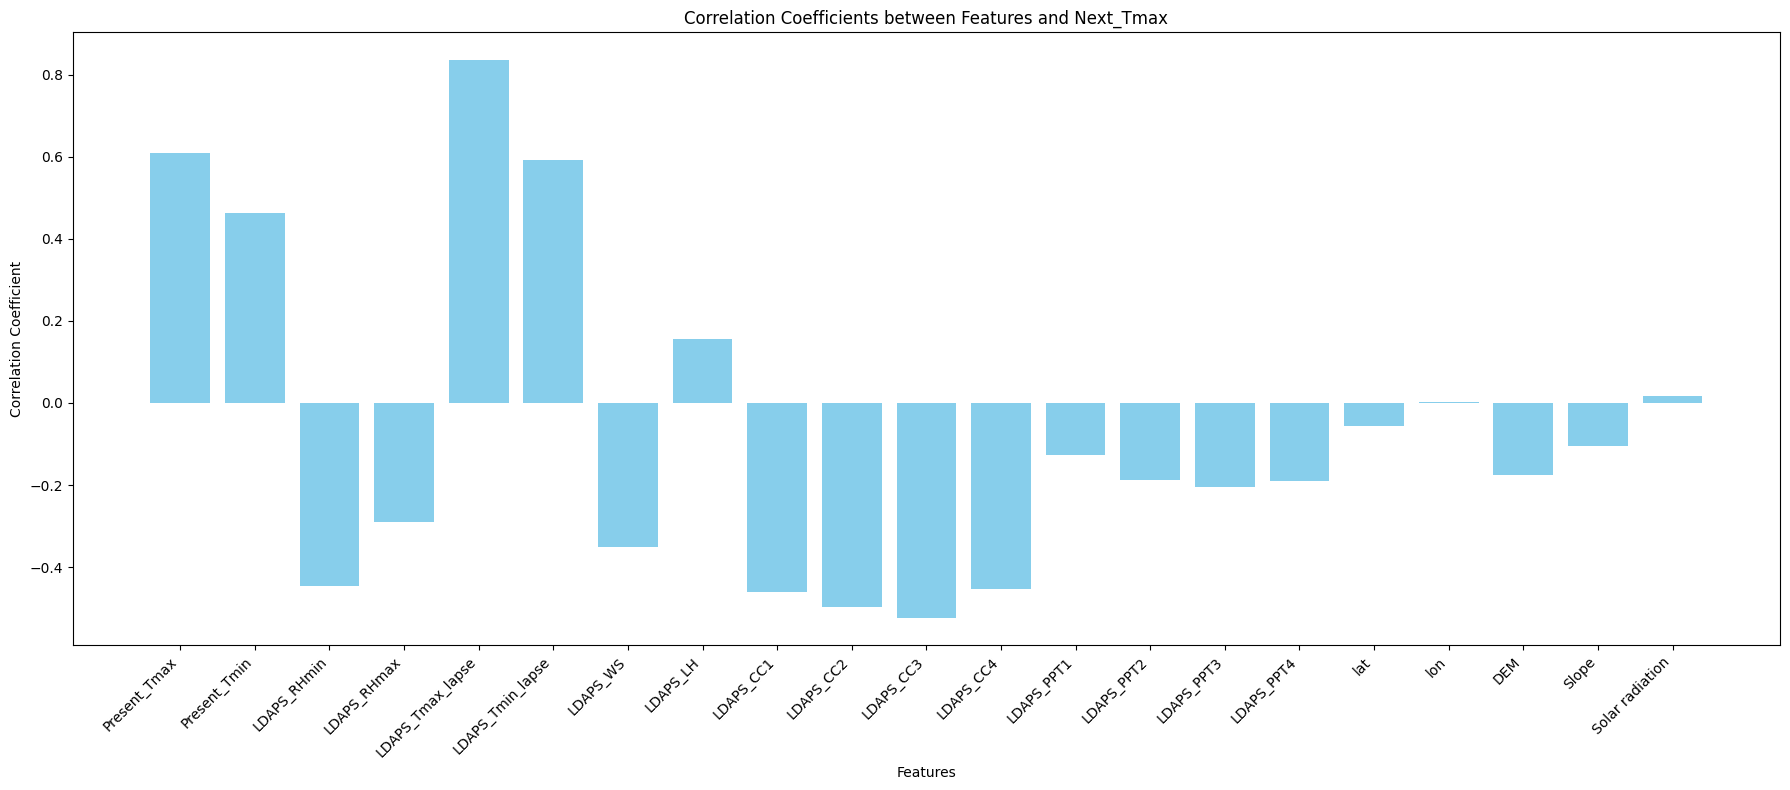

In [10]:
#the features parameter is all the 22 columns other than the output feature in the dataset
features = df.iloc[:,:21].values
y_train = df.iloc[:, 21].values

correlations = np.corrcoef(features, y_train, rowvar=False)[:21, -1]
column_names = df.columns[:21]
plt.figure(figsize=(18, 8))
plt.bar(range(1, 22), correlations, tick_label=column_names, color='skyblue')
plt.title('Correlation Coefficients between Features and Next_Tmax')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Top 5 features:

1) Present_Tmax
2) Present_Tmin
3) LDAPS_Tmax_lapse
4) LDAPS_Tmin_lapse
5) LDAPS_CC3

### 7) Improving Performance

Now, we will try to improve performance of the model we have developed, i.e further reducing the cost, by selecting some other input feature instead of `Present_Tmax`, keeping the desired output as `Next_Tmax`

* We will also plot the final values of the cost function J for both models.

In [11]:
x2 = df['LDAPS_Tmax_lapse'].values.reshape(-1,1)
y2 = df['Next_Tmax'].values.reshape(-1,1)

x2_train, x2_test, y2_train, y2_test = model_selection.train_test_split(x2, y2, test_size=0.3, random_state=42)

mean2 = np.mean(x2_train)
stdev2 = np.std(x2_train)
normalized_x2_train = (x2_train - mean2)/stdev2
normalized_x2_test = (x2_test - mean2)/stdev2

n_epoch = 5000
alpha = 0.001
theta0, theta1, J = gradient_descent_SLR(normalized_x2_train, y2_train, alpha, n_epoch)
print('Predicted theta0 = %.4f, theta1 = %.4f, cost = %.4f' % (theta0, theta1, J[-1]))

[4737204.99497719]
[4727766.55178674]
[4718346.97604423]
[4708946.23003362]
[4699564.27611431]
[4690201.07672087]
[4680856.59436301]
[4671530.79162538]
[4662223.63116745]
[4652935.07572326]
[4643665.0881014]
[4634413.6311848]
[4625180.66793057]
[4615966.16136988]
[4606770.07460781]
[4597592.37082318]
[4588433.01326842]
[4579291.96526942]
[4570169.19022536]
[4561064.6516086]
[4551978.31296457]
[4542910.13791145]
[4533860.09014028]
[4524828.13341459]
[4515814.23157042]
[4506818.34851601]
[4497840.44823185]
[4488880.49477034]
[4479938.4522558]
[4471014.28488425]
[4462107.95692328]
[4453219.4327119]
[4444348.6766604]
[4435495.65325029]
[4426660.32703395]
[4417842.66263473]
[4409042.62474664]
[4400260.17813429]
[4391495.28763269]
[4382747.91814724]
[4374018.03465338]
[4365305.6021966]
[4356610.58589232]
[4347932.95092566]
[4339272.66255126]
[4330629.68609332]
[4322003.98694532]
[4313395.53056995]
[4304804.28249884]
[4296230.20833264]
[4287673.2737407]
[4279133.44446101]
[4270610.68630003]
[

/var/folders/5l/z_f8vl_56236dtty6zj589g00000gn/T/ipykernel_69213/1147226882.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Predicted theta0 = %.4f, theta1 = %.4f, cost = %.4f' % (theta0, theta1, J[-1]))


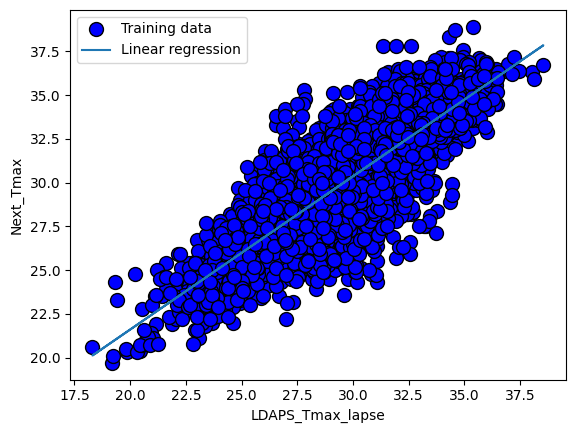

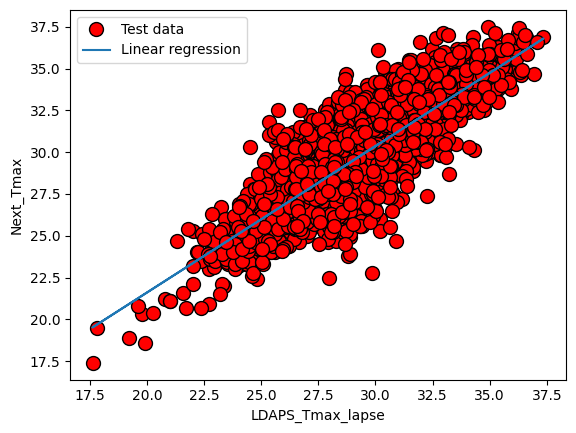

In [12]:
y2_pred_list_train = list()
for x in normalized_x2_train:
    y2_pred_list_train.append(predict_SLR(x, theta0, theta1))

plt.plot(x2_train, y2_train, 'bo', ms=10, mec='k')
plt.ylabel('Next_Tmax')
plt.xlabel('LDAPS_Tmax_lapse')
plt.plot(x2_train, y2_pred_list_train, '-')
plt.legend(['Training data', 'Linear regression'])
plt.show()

y2_pred_list_test = list()
for x in normalized_x2_test:
    y2_pred_list_test.append(predict_SLR(x, theta0, theta1))

plt.plot(x2_test, y2_test, 'ro', ms=10, mec='k')
plt.ylabel('Next_Tmax')
plt.xlabel('LDAPS_Tmax_lapse')
plt.plot(x2_test, y2_pred_list_test, '-')
plt.legend(['Test data', 'Linear regression'])
plt.show()

## Part 2: Multi-Variate Linear Regression 

We will now use a similar concept as in the previous part to train a multivariate regression model on the same dataset. Instead of using just one input feature, we will now use the `Top-5 input features` that we selected in the previous part. These features will be used to predict the next day temperature `(Next_Tmax)`

#### 1) Feature Extraction:

First, we extract the top five features from the dataset

In [38]:
X = df[['Present_Tmax', 'Present_Tmin','LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_CC3' ]].values
Y = df['Next_Tmax'].values.reshape(-1,1)

#### 2) Splitting the dataset
Then, we make a `70-30` split to divide the dataset into training and test datasets which will result in 4 variables: X_train, Y_train, X_test, Y_test

In [39]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state=42)

scaler = StandardScaler()
Xtrain_normalized = scaler.fit_transform(X_train)
Xtrain_normalized_with_bias = np.insert(Xtrain_normalized, 0, 1, axis=1)
Xtest_normalized = scaler.fit_transform(X_test)
Xtest_normalized_with_bias = np.insert(Xtest_normalized, 0, 1, axis=1)

## Learn the parameters for Multivariate Regression

In multivariate regression, we predict the output using multiple input features. The model has the form:

$$
\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n
$$

where:
- $\hat{y}$ is the predicted value
- $x_i$ represents each input feature
- $\theta_i$ are the parameters of our model

The cost function for multivariate regression is an extension of the univariate case and is given by:

$$
J(\Theta) = \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2
$$

Here, $\Theta$ represents the parameter vector $(\theta_0, \theta_1, ..., \theta_n)$, and $m$ is the number of training examples.

To minimize the cost function $J(\Theta)$, we use a method such as gradient descent, where each parameter $\theta_j$ is updated as follows:

$$
\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})x_j^{(i)}
$$

- $\alpha$ is the learning rate
- The summation is over all training examples


With each iteration of gradient descent, the parameters $\Theta$ come closer to the optimal values that minimize the cost function $J(\Theta)$.

#### 3) Linear Regression:

We will implement <b>Gradient Descent</b> to train the model on the data. We will be using Mean Square Error as the cost function.

In [40]:
def predict_MLR(normalized_array, thetas): 
    Y_predicted = np.dot(normalized_array, thetas)
    return Y_predicted

def cost_MLR(Y_actual, Y_hypothesis):
    cost = 0
    for i in range (0,len(Y_hypothesis)):
        cost = cost + ((Y_hypothesis[i] - Y_actual[i]) ** 2)
    cost = (cost/(2 * len(Y_hypothesis)))
    print (cost) 
    return cost

def partial(Y_actual, Y_hypothesis, normalized_features_array):
    
    result = np.array(Y_hypothesis) - np.array(Y_actual)
    result = result * np.array(normalized_features_array)
    result = np.sum(result)
    return result

def gradient_descent_MLR(Xnormalized, Ytrain, alpha, epochs, size):
    J = []
    thetas = [0.5]*size
    thetas = np.array(thetas).reshape(-1,1)
    
    for i in range(epochs):
        temp = predict_MLR(Xnormalized, thetas)
        cost = cost_MLR(Ytrain, temp)
        J.append(cost)
        
        thetas = thetas - ((alpha/len(Ytrain))*(partial(Ytrain, temp, Xnormalized)))
        
    return thetas, J

#### 4) Run the Regression

For the specified number of epochs, we run the regression and store the costs and corresponding thetas for each epoch.

In [41]:
n_epoch = 1000
learning_rate = 0.001
thetas, J1= gradient_descent_MLR(Xtrain_normalized_with_bias, Y_train, learning_rate, n_epoch, 6) 

[445.55148616]
[444.63446692]
[443.73924825]
[442.86531189]
[442.01215189]
[441.17927432]
[440.36619701]
[439.57244923]
[438.79757146]
[438.04111509]
[437.3026422]
[436.58172524]
[435.87794687]
[435.19089963]
[434.52018578]
[433.86541701]
[433.22621426]
[432.60220748]
[431.9930354]
[431.39834535]
[430.81779305]
[430.2510424]
[429.69776528]
[429.15764139]
[428.63035803]
[428.11560994]
[427.61309912]
[427.12253463]
[426.64363249]
[426.17611543]
[425.7197128]
[425.27416037]
[424.8392002]
[424.41458046]
[424.00005534]
[423.59538485]
[423.20033472]
[422.81467624]
[422.43818613]
[422.07064643]
[421.71184437]
[421.36157223]
[421.0196272]
[420.68581135]
[420.35993139]
[420.04179869]
[419.73122904]
[419.42804267]
[419.13206404]
[418.84312179]
[418.56104867]
[418.28568135]
[418.01686042]
[417.75443025]
[417.49823892]
[417.2481381]
[417.00398301]
[416.76563229]
[416.53294795]
[416.30579529]
[416.0840428]
[415.8675621]
[415.65622786]
[415.44991774]
[415.24851229]
[415.05189491]
[414.85995177]
[414

### Visualizing the costs
You can run the following cell to see how your costs change with each epoch.

Text(0, 0.5, 'cost')

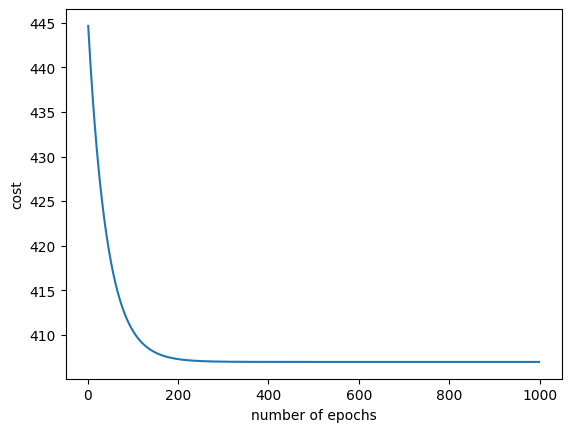

In [42]:
plt.plot(np.arange(1,n_epoch),J1[1:])
plt.xlabel("number of epochs")
plt.ylabel("cost")

### All input features

Now, we will use `ALL` the input features to predict `Next_Tmax`.

We extract the features and run the following code block again. Make note of the differences between this model and the one that only used `five features`.


In [43]:
features = df.iloc[:,:21].values
output = df.iloc[:, 21].values.reshape(-1,1)

We perform 70-30 split on the dataset again.

In [44]:
features_train, features_test, output_train, output_test = model_selection.train_test_split(features, output, test_size=0.3, random_state=42)

scaler = StandardScaler()
normalized_features_train = scaler.fit_transform(features_train)
normalized_features_train_with_bias = np.insert(normalized_features_train, 0, 1, axis=1)
normalized_features_test = scaler.fit_transform(features_test)
normalized_features_test_with_bias = np.insert(normalized_features_test, 0, 1, axis=1)

We call the gradient descent function.

In [45]:
n_epoch = 1000
learning_rate = 0.001
thetas, J2= gradient_descent_MLR(normalized_features_train_with_bias, output_train, learning_rate, n_epoch, 22) 

[456.09966664]
[456.09741831]
[456.09541114]
[456.09361924]
[456.09201953]
[456.09059139]
[456.08931643]
[456.08817822]
[456.08716208]
[456.08625493]
[456.08544508]
[456.08472209]
[456.08407664]
[456.08350041]
[456.082986]
[456.08252675]
[456.08211676]
[456.08175074]
[456.08142399]
[456.08113227]
[456.08087185]
[456.08063935]
[456.0804318]
[456.0802465]
[456.08008108]
[456.0799334]
[456.07980156]
[456.07968386]
[456.07957878]
[456.07948498]
[456.07940123]
[456.07932647]
[456.07925972]
[456.07920014]
[456.07914694]
[456.07909945]
[456.07905706]
[456.07901921]
[456.07898542]
[456.07895526]
[456.07892833]
[456.07890428]
[456.07888282]
[456.07886366]
[456.07884655]
[456.07883128]
[456.07881765]
[456.07880548]
[456.07879461]
[456.07878491]
[456.07877625]
[456.07876852]
[456.07876162]
[456.07875546]
[456.07874996]
[456.07874505]
[456.07874066]
[456.07873675]
[456.07873325]
[456.07873014]
[456.07872735]
[456.07872486]
[456.07872264]
[456.07872066]
[456.07871889]
[456.07871732]
[456.07871591]


Visualise the cost.

Text(0, 0.5, 'cost')

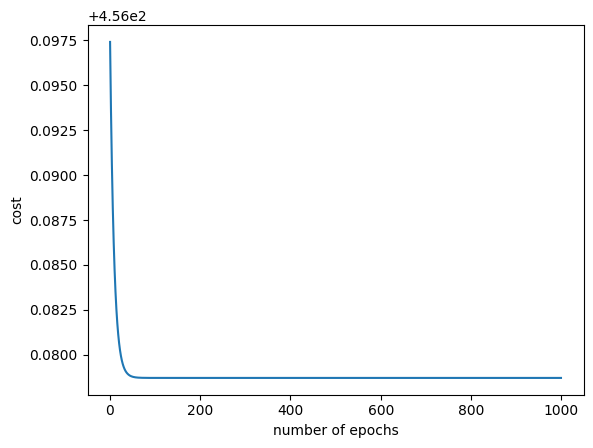

In [46]:
plt.plot(np.arange(1,n_epoch),J2[1:])
plt.xlabel("number of epochs")
plt.ylabel("cost")